In [1]:
import cv2
from pupil_detectors import Detector2D

import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 15

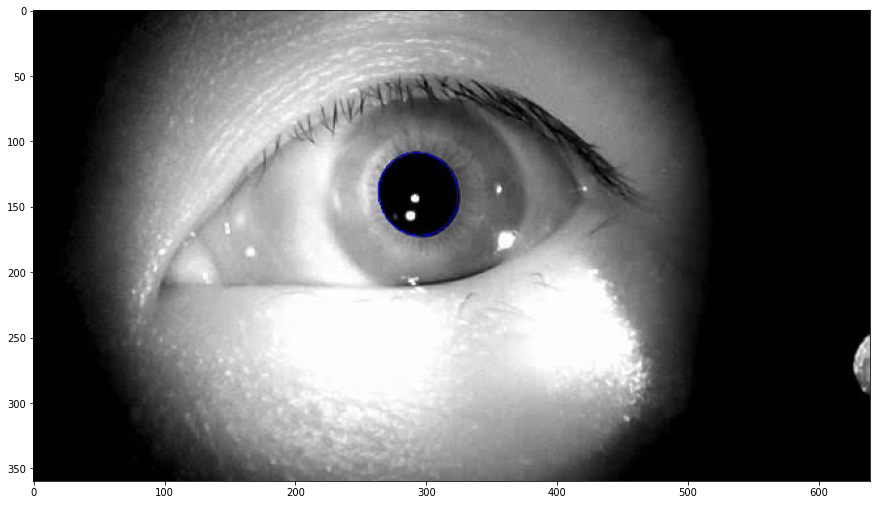

In [8]:
video_path = '../data/video/eye_lighter.mp4'
cap = cv2.VideoCapture(video_path)

detector = Detector2D()

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    result = detector.detect(gray)
    ellipse = result["ellipse"]

    # draw the ellipse outline onto the input image
    # note that cv2.ellipse() cannot deal with float values
    # also it expects the axes to be semi-axes (half the size)
    cv2.ellipse(
        frame,
        tuple(int(v) for v in ellipse["center"]),
        tuple(int(v / 2) for v in ellipse["axes"]),
        ellipse["angle"],
        0, 360, # start/end angle for drawing
        (0, 0, 255) # color (BGR): red
    )
    plt.imshow(frame)
    plt.show()
    break

# When everything done, release the capture
cap.release()


In [ ]:
detector = Detector2D()

# read image as numpy array from somewhere, e.g. here from a file
img = cv2.imread("pupil.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

result = detector.detect(gray)
ellipse = result["ellipse"]

# draw the ellipse outline onto the input image
# note that cv2.ellipse() cannot deal with float values
# also it expects the axes to be semi-axes (half the size)
cv2.ellipse(
    img,
    tuple(int(v) for v in ellipse["center"]),
    tuple(int(v / 2) for v in ellipse["axes"]),
    ellipse["angle"],
    0, 360, # start/end angle for drawing
    (0, 0, 255) # color (BGR): red
)
cv2.imshow("Image", img)
cv2.waitKey(0)